# Applied Data Science Capstone Project

## Predicting the Car Accident Severity in Seattle Using KNN, Decision Tree and Logistic Regression

This is the final capstone project where I applied the different data science concepts that I learned till now. The data set was taken from Seattle car accident data. And based on that, I performed some visualizations on each attribute for the given severity index. Later, I applied three machine learning techniques which are K-Nearest Neighbor, Decision Tree and Logistic Regression to predict the severity index of the car accidents in Seattle.

In [100]:
#importing python libraries
import numpy as np
import pandas as pd

In [101]:
#downloading the csv datafile and retrieving the first 5 columns
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df.shape

(194673, 38)

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
df['STATUS'].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [7]:
#Removing the unmatched status from the dataset
df = df[df['STATUS'] == "Matched"]
df['STATUS'].value_counts()

Matched    189786
Name: STATUS, dtype: int64

In [8]:
df.shape

(189786, 38)

In [9]:
df['SEVERITYCODE'].value_counts()

1    132627
2     57159
Name: SEVERITYCODE, dtype: int64

In [10]:
#Resampling the imbalanced dataset
df1=df[['SEVERITYCODE','LOCATION','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR']]
df1.head()

,SEVERITYCODE,LOCATION,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR
0,2,5TH AVE NE AND NE 103RD ST,Intersection,Angles,2,0,0,2,Overcast,Wet,Daylight,NaN,NaN,N,N
1,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Block,Sideswipe,2,0,0,2,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,N
2,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Block,Parked Car,4,0,0,3,Overcast,Dry,Daylight,NaN,NaN,0,N
3,1,2ND AVE BETWEEN MARION ST AND MADISON ST,Block,Other,3,0,0,3,Clear,Dry,Daylight,NaN,NaN,N,N
4,2,SWIFT AVE S AND SWIFT AV OFF RP,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight,NaN,NaN,0,N


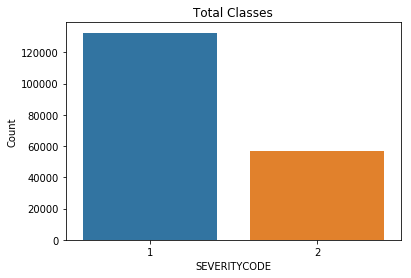

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot('SEVERITYCODE', data = df1)
plt.title('Total Classes')
plt.ylabel('Count')
plt.show()

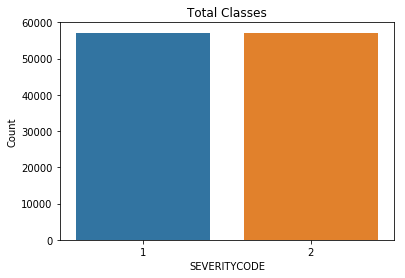

In [12]:
#Creating a balanced dataset using resampling
df1_shuffled=df1.sample(frac=1,random_state=4)
df1_2=df1_shuffled.loc[df1_shuffled['SEVERITYCODE'] == 2]
df1_1=df1_shuffled.loc[df1_shuffled['SEVERITYCODE'] == 1].sample(n=57159,random_state=42)
df2 = pd.concat([df1_1, df1_2])
df2.shape
sns.countplot('SEVERITYCODE', data = df2)
plt.title('Total Classes')
plt.ylabel('Count')
plt.show()

In [13]:
df2.shape

(114318, 15)

Based on the severity code, I grouped the other features and checked the number of accidents that occurred for each attribute's each point

In [14]:
df2['COLLISIONTYPE'].value_counts()

Rear Ended    22936
Angles        22724
Parked Car    22331
Other         13748
Sideswipe      9340
Left Turn      8973
Pedestrian     6254
Cycles         5040
Right Turn     1609
Head On        1347
Name: COLLISIONTYPE, dtype: int64

In [15]:
df2.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize = True)

COLLISIONTYPE  SEVERITYCODE
Angles         2               0.599542
               1               0.400458
Cycles         2               0.941270
               1               0.058730
Head On        2               0.647365
               1               0.352635
Left Turn      2               0.603031
               1               0.396969
Other          1               0.555426
               2               0.444574
Parked Car     1               0.880794
               2               0.119206
Pedestrian     2               0.948993
               1               0.051007
Rear Ended     2               0.639649
               1               0.360351
Right Turn     1               0.621504
               2               0.378496
Sideswipe      1               0.731692
               2               0.268308
Name: SEVERITYCODE, dtype: float64

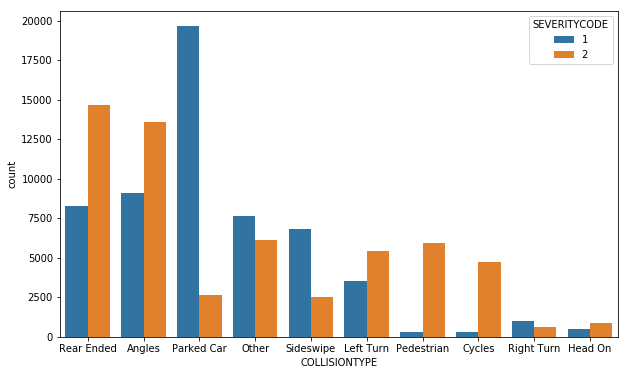

In [16]:
f, ax = plt.subplots(figsize = (10,6))
sns.countplot(x = 'COLLISIONTYPE', hue = 'SEVERITYCODE', data = df2, 
              order = df2['COLLISIONTYPE'].value_counts().index)

In [17]:
accident_locations = df2['LOCATION'].value_counts()
accident_locations[0:20]

BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          180
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          180
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                170
6TH AVE AND JAMES ST                                                                    159
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   153
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                148
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          146
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                          138
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP              133
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP    131
5TH AVE AND SPRING ST                                                           

In [18]:
df2['ADDRTYPE'].value_counts()

Block           70126
Intersection    42965
Alley             343
Name: ADDRTYPE, dtype: int64

In [19]:
df2.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize = True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.763848
              2               0.236152
Block         1               0.579371
              2               0.420629
Intersection  2               0.637984
              1               0.362016
Name: SEVERITYCODE, dtype: float64

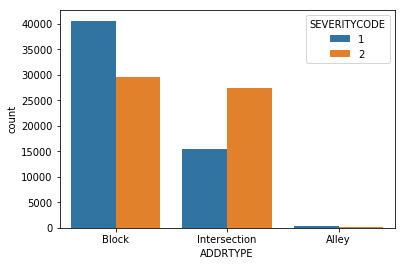

In [20]:
df2['ADDRTYPE'].value_counts()
df2.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize = True)
sns.countplot(x = 'ADDRTYPE', hue = 'SEVERITYCODE', data = df2, 
              order = df2['ADDRTYPE'].value_counts().index)

In [21]:
df2['ADDRTYPE'].replace(to_replace = ['Alley', 'Block', 'Intersection'], value = [0, 1, 2], inplace = True)

In [22]:
df2['PERSONCOUNT'].value_counts()

2     63669
3     22655
4      9764
1      6751
5      4483
0      3389
6      1939
7       842
8       390
9       164
10      101
11       45
12       27
13       20
14        9
17        9
15        8
16        8
19        4
20        4
18        3
25        3
27        3
34        3
37        2
24        2
29        2
30        2
22        2
23        1
53        1
48        1
47        1
44        1
43        1
39        1
31        1
36        1
32        1
28        1
26        1
81        1
54        1
57        1
Name: PERSONCOUNT, dtype: int64

In [23]:
df2.groupby(['PERSONCOUNT'])['SEVERITYCODE'].value_counts(normalize = True)

PERSONCOUNT  SEVERITYCODE
0            2               0.519622
             1               0.480378
1            1               0.552066
             2               0.447934
2            1               0.571754
             2               0.428246
3            2               0.588524
             1               0.411476
4            2               0.636215
             1               0.363785
5            2               0.662280
             1               0.337720
6            2               0.699845
             1               0.300155
7            2               0.756532
             1               0.243468
8            2               0.728205
             1               0.271795
9            2               0.786585
             1               0.213415
10           2               0.732673
             1               0.267327
11           2               0.733333
             1               0.266667
12           2               0.740741
             1          

In [25]:
df2['PEDCOUNT'].value_counts()

0    107749
1      6330
2       211
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [26]:
df2.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts(normalize = True)

PEDCOUNT  SEVERITYCODE
0         1               0.527439
          2               0.472561
1         2               0.948973
          1               0.051027
2         2               0.981043
          1               0.018957
3         2               0.954545
          1               0.045455
4         2               1.000000
5         2               1.000000
6         2               1.000000
Name: SEVERITYCODE, dtype: float64

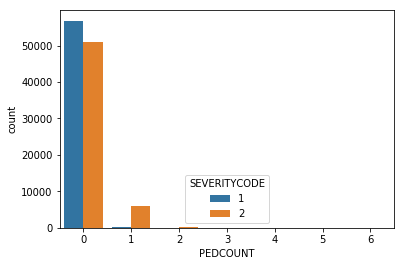

In [27]:
sns.countplot(x = 'PEDCOUNT', hue = 'SEVERITYCODE', data = df2)

In [29]:
df2['PEDCYLCOUNT'].value_counts()

0    109213
1      5062
2        43
Name: PEDCYLCOUNT, dtype: int64

In [30]:
df2.groupby(['PEDCYLCOUNT'])['SEVERITYCODE'].value_counts(normalize = True)

PEDCYLCOUNT  SEVERITYCODE
0            1               0.520625
             2               0.479375
1            2               0.940735
             1               0.059265
2            2               1.000000
Name: SEVERITYCODE, dtype: float64

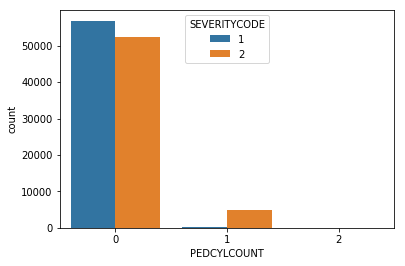

In [31]:
sns.countplot(x = 'PEDCYLCOUNT', hue = 'SEVERITYCODE', data = df2, order = df2['PEDCYLCOUNT'].value_counts().index)


In [32]:
df2.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

VEHCOUNT  SEVERITYCODE
0         2               0.990000
          1               0.010000
1         2               0.736400
          1               0.263600
2         1               0.572199
          2               0.427801
3         2               0.624857
          1               0.375143
4         2               0.651753
          1               0.348247
5         2               0.701613
          1               0.298387
6         2               0.612245
          1               0.387755
7         2               0.628571
          1               0.371429
8         2               0.714286
          1               0.285714
9         2               0.857143
          1               0.142857
10        2               1.000000
11        2               1.000000
Name: SEVERITYCODE, dtype: float64

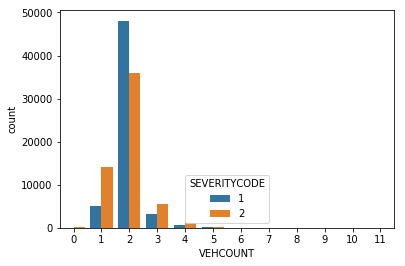

In [33]:
sns.countplot(x="VEHCOUNT", hue="SEVERITYCODE", data=df2)

In [34]:
df2['WEATHER'].value_counts()

Clear                       68208
Raining                     20739
Overcast                    16871
Unknown                      7000
Snowing                       460
Other                         450
Fog/Smog/Smoke                356
Sleet/Hail/Freezing Rain       69
Blowing Sand/Dirt              31
Severe Crosswind               16
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [35]:
df2.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.516129
                          2               0.483871
Clear                     2               0.525452
                          1               0.474548
Fog/Smog/Smoke            2               0.525281
                          1               0.474719
Other                     1               0.742222
                          2               0.257778
Overcast                  2               0.518345
                          1               0.481655
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   2               0.538888
                          1               0.461112
Severe Crosswind          1               0.562500
                          2               0.437500
Sleet/Hail/Freezing Rain  1               0.594203
                          2               0.405797
Snowing                   1               0

In [36]:
df2['WEATHER'].replace(to_replace=['Other','Unknown','Clear','Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'],value=[0,0,1,3,2,3,3,3,3,3,2],inplace=True)
indexNames = df2[df2['WEATHER'] == 0 ].index
df2.drop(indexNames, inplace=True)
df2['WEATHER'].value_counts()

1.0    68208
3.0    21671
2.0    16876
Name: WEATHER, dtype: int64

In [37]:

df2['ROADCOND'].value_counts()

Dry               75863
Wet               29203
Ice                 609
Snow/Slush          459
Unknown             450
Other                69
Standing Water       68
Sand/Mud/Dirt        47
Oil                  37
Name: ROADCOND, dtype: int64

In [38]:
df2.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             2               0.525711
                1               0.474289
Ice             1               0.566502
                2               0.433498
Oil             2               0.648649
                1               0.351351
Other           2               0.594203
                1               0.405797
Sand/Mud/Dirt   1               0.531915
                2               0.468085
Snow/Slush      1               0.647059
                2               0.352941
Standing Water  1               0.558824
                2               0.441176
Unknown         1               0.742222
                2               0.257778
Wet             2               0.536109
                1               0.463891
Name: SEVERITYCODE, dtype: float64

In [39]:
df2['ROADCOND'].replace(to_replace=['Other','Unknown','Dry','Wet','Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'],value=[0,0,1,2,3,3,3,2,2],inplace=True)
indexNames = df2[df2['ROADCOND'] == 0 ].index
df2.drop(indexNames, inplace=True)
df2.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND  SEVERITYCODE
1.0       2               0.525711
          1               0.474289
2.0       2               0.536142
          1               0.463858
3.0       1               0.598592
          2               0.401408
Name: SEVERITYCODE, dtype: float64

In [40]:
df2['LIGHTCOND'].value_counts()

Daylight                    70351
Dark - Street Lights On     28207
Dusk                         3464
Dawn                         1500
Unknown                      1139
Dark - No Street Lights       774
Dark - Street Lights Off      661
Other                         112
Dark - Unknown Lighting         5
Name: LIGHTCOND, dtype: int64

In [41]:
df2.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.583979
                          2               0.416021
Dark - Street Lights Off  1               0.532526
                          2               0.467474
Dark - Street Lights On   2               0.506505
                          1               0.493495
Dark - Unknown Lighting   2               0.600000
                          1               0.400000
Dawn                      2               0.537333
                          1               0.462667
Daylight                  2               0.541513
                          1               0.458487
Dusk                      2               0.550231
                          1               0.449769
Other                     1               0.580357
                          2               0.419643
Unknown                   1               0.791923
                          2               0.208077
Name: SEVERITYCODE, dtype: float64

In [42]:

df2['LIGHTCOND'].replace(to_replace=['Other','Unknown','Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'],value=[0,0,1,3,2,2,4,4,4],inplace=True)
indexNames = df2[df2['LIGHTCOND'] == 0 ].index
df2.drop(indexNames, inplace=True)
df2.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND  SEVERITYCODE
1.0        2               0.541513
           1               0.458487
2.0        2               0.546334
           1               0.453666
3.0        2               0.506505
           1               0.493495
4.0        1               0.559722
           2               0.440278
Name: SEVERITYCODE, dtype: float64

In [43]:

df2['SPEEDING'].value_counts()

Y    5958
Name: SPEEDING, dtype: int64

In [44]:
values = {'SPEEDING': 0, 'INATTENTIONIND': 0}
df2=df2.fillna(value=values)

In [45]:
df2['HITPARKEDCAR'].value_counts()

N    102736
Y      2362
Name: HITPARKEDCAR, dtype: int64

In [46]:
df2['SPEEDING'].replace(to_replace=['Y'],value=[1],inplace=True)
df2['INATTENTIONIND'].replace(to_replace=['Y'],value=[1],inplace=True)
df2['UNDERINFL'].replace(to_replace=['N','0','Y','1'],value=[0,0,1,1],inplace=True)
df2['HITPARKEDCAR'].replace(to_replace=['N','Y'],value=[0,1],inplace=True)

In [47]:
df2 = df2.dropna(how = 'any')
df2.reset_index(drop = True, inplace = True)
df2.head()

,SEVERITYCODE,LOCATION,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR
0,1,10TH AVE AND E PIKE ST,2.0,Angles,3,0,0,2,3.0,2.0,1.0,0,0,0,0
1,1,26TH AVE NW AND NW 75TH ST,2.0,Angles,2,0,0,2,2.0,1.0,1.0,0,0,0,0
2,1,33RD AVE W BETWEEN W ELMORE ST AND W GOVERNMEN...,1.0,Parked Car,2,0,0,2,1.0,1.0,2.0,0,0,0,0
3,1,GREENWOOD AVE N BETWEEN N 104TH ST AND HOLMAN ...,1.0,Rear Ended,2,0,0,2,1.0,1.0,1.0,0,1,0,0
4,1,15TH AVE NE BETWEEN PINEHURST WAY NE AND NE 12...,1.0,Parked Car,2,0,0,2,2.0,3.0,3.0,0,0,1,0


In [48]:
df2['UNDERINFL'].value_counts()

0    98396
1     5777
Name: UNDERINFL, dtype: int64

In [49]:
df2.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)

UNDERINFL  SEVERITYCODE
0          2               0.528091
           1               0.471909
1          2               0.604293
           1               0.395707
Name: SEVERITYCODE, dtype: float64

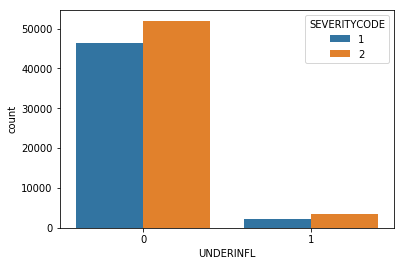

In [50]:
sns.countplot(x="UNDERINFL", hue="SEVERITYCODE", data=df2)

In [51]:
df2.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)

SPEEDING  SEVERITYCODE
0         2               0.529344
          1               0.470656
1         2               0.581754
          1               0.418246
Name: SEVERITYCODE, dtype: float64

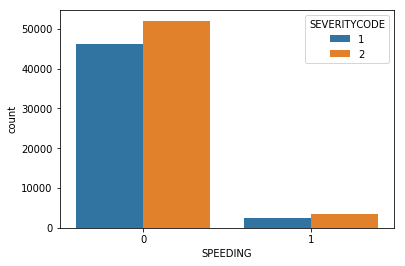

In [52]:
sns.countplot(x="SPEEDING", hue="SEVERITYCODE", data=df2)

In [53]:
from sklearn.linear_model import LinearRegression
X = df2[['WEATHER']]
y = df2[['ROADCOND']]
lm = LinearRegression()
lm.fit(X, y)
yhat = lm.predict(X)
lm.score(X, y)

0.6099962464814801

In [54]:
X=df2[['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','WEATHER','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR']]
X.reset_index(drop=True,inplace=True)
X.head()

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR
0,2.0,3,0,0,2,3.0,1.0,0,0,0,0
1,2.0,2,0,0,2,2.0,1.0,0,0,0,0
2,1.0,2,0,0,2,1.0,2.0,0,0,0,0
3,1.0,2,0,0,2,1.0,1.0,0,1,0,0
4,1.0,2,0,0,2,2.0,3.0,0,0,1,0


In [55]:
y = df2['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Decision Tree

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (83338, 11) (83338,)
Test set: (20835, 11) (20835,)


In [57]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(criterion="entropy", max_depth =5)
Dtree.fit(X_train,y_train)
Dtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
yhat = Dtree.predict(X_test)
yhat

array([2, 2, 2, ..., 1, 1, 2])

In [59]:
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.6488120950323975


In [60]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.66      0.52      0.58      9693
           2       0.64      0.76      0.70     11142

   micro avg       0.65      0.65      0.65     20835
   macro avg       0.65      0.64      0.64     20835
weighted avg       0.65      0.65      0.64     20835



In [66]:
X1=df2[['ADDRTYPE','WEATHER','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL']]
X1.reset_index(drop=True,inplace=True)
X1.head()

,ADDRTYPE,WEATHER,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
0,2.0,3.0,1.0,0,0,0
1,2.0,2.0,1.0,0,0,0
2,1.0,1.0,2.0,0,0,0
3,1.0,1.0,1.0,0,1,0
4,1.0,2.0,3.0,0,0,1


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
Dtree1 = DecisionTreeClassifier(criterion="entropy", max_depth =5)
Dtree1.fit(X_train,y_train)
yhat1 = Dtree1.predict(X_test)
yhat1

array([2, 2, 2, ..., 1, 1, 2])

In [69]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))
print(classification_report(y_test, yhat))

DecisionTrees's Accuracy:  0.6488120950323975
              precision    recall  f1-score   support

           1       0.66      0.52      0.58      9693
           2       0.64      0.76      0.70     11142

   micro avg       0.65      0.65      0.65     20835
   macro avg       0.65      0.64      0.64     20835
weighted avg       0.65      0.65      0.64     20835



In [83]:
from sklearn.metrics import f1_score
dt_f1= f1_score(y_test, yhat1, average='weighted')
print("The F1-score is",dt_f1 )
dt_jac=jaccard_score(y_test, yhat1)
print("The Jaccard similarity score is",dt_jac)

The F1-score is 0.642835992248244
The Jaccard similarity score is 0.6488120950323975


## K-Nearest Neighbor

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (83338, 11) (83338,)
Test set: (20835, 11) (20835,)


In [71]:
from sklearn.neighbors import KNeighborsClassifier
k = 4

neigh4 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh4
 
yhat = neigh4.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh4.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6180253905781277
Test set Accuracy:  0.6089272858171346


Best accuracy for k= 7


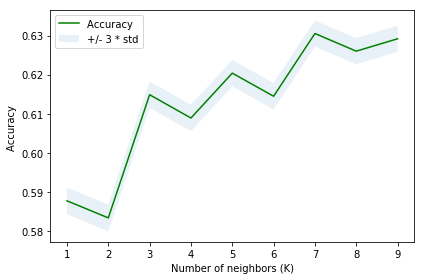

In [78]:

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
   # print('Iteration n.: ', n)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
print ("Best accuracy for k=", mean_acc.argmax()+1)


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 * std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of neighbors (K)')
plt.tight_layout()
plt.show()

In [84]:
from sklearn import metrics
from sklearn.metrics import f1_score
KNNf1=f1_score(y_test, yhat, average='weighted')
# from sklearn.metrics import jaccard_score   issue with sklearn version!
from sklearn.metrics import jaccard_similarity_score as jaccard_score
KNNjac=jaccard_score(y_test, yhat)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh5.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("The F1-score is",KNNf1 )
print("The Jaccard similarity score is",KNNjac)

Train set Accuracy:  0.6395041877654851
Test set Accuracy:  0.6291816654667627
The F1-score is 0.6293664643909398
The Jaccard similarity score is 0.6291816654667627


## Logistic Regression

In [85]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LogR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)
LogR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


Train set: (83338, 11) (83338,)
Test set: (20835, 11) (20835,)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat3 = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [87]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat3))
from sklearn.metrics import f1_score
print("LR's Accuracy: ", metrics.accuracy_score(y_test, yhat3))
LRf1=f1_score(y_test, yhat3, average='weighted')
print("The F1-score is", LRf1)
LRjac=jaccard_score(y_test, yhat3)
print("The Jaccard similarity score is",LRjac)
from sklearn.metrics import log_loss
LRll=log_loss(y_test, yhat_prob)
print("The logLoss value is:",LRll)

Train set Accuracy:  0.6448318894141928
Test set Accuracy:  0.6489560835133189
LR's Accuracy:  0.6489560835133189
The F1-score is 0.6493694954639817
The Jaccard similarity score is 0.6489560835133189
The logLoss value is: 0.6106625494967596


In [91]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6338 3355]
 [3959 7183]]


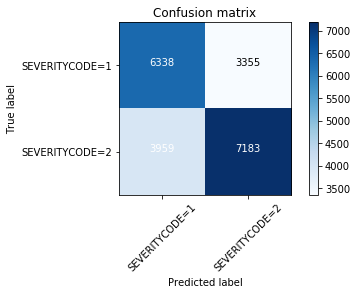

In [92]:
plot_confusion_matrix(confusion_matrix(y_test, yhat3, labels=[1,2]), classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= False,  title='Confusion matrix')

# Evaulation Metrics for Each Algorithm

Below the list of machine learning algorithms that were used in predicting the car accident severity index. Evaluation metrics are calculated using jaccard index, f1-score and logloss.

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.62    | 0.62     | NA      |
| Decision Tree      | 0.64    | 0.64     | NA      |
| LogisticRegression | 0.64    | 0.64     | 0.61    |

Based on the above results, it is not very suitable to predict the severity index based on the given data. Even though, decision tree performed good, it is not really able to predict the severity index based on the machine learning techniques used.